<a href="https://colab.research.google.com/github/natdebandi/migmobs/blob/main/Mobility_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS

**Natalia Dedandi**




## Mobility

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#G:\My Drive\3. Proyectos\MIGMOBS_nat\3_data_repository
# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/db_indicators_7_1_2025.csv'

df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
  country_code  year       value        indicator    fuente
0          ARG  2011  12133921.0  target_mobility  Mobitity
1          CHL  2011   5916559.0  target_mobility  Mobitity
2          ARG  2012  12678938.0  target_mobility  Mobitity
3          CHL  2012   6528705.0  target_mobility  Mobitity
4          ARG  2013  12500972.0  target_mobility  Mobitity


**Mobility**

I1.1 Mouvements to country target_mobility

I1.2 Mouvements from country source_mobility

I1.3 Mouvements to country from LATAM target_mobility_latam

In [3]:
mobility_df = df[df['indicator'] == 'target_mobility']

In [4]:
# Pivot the table to have 'source_mobility' and 'target_mobility' as columns
mobility_df_pivot = mobility_df.pivot_table(index=['indicator', 'year'], columns='country_code', values='value').reset_index()
mobility_df_pivot

country_code,indicator,year,ARG,CHL
0,target_mobility,2011,12133921.0,5916559.0
1,target_mobility,2012,12678938.0,6528705.0
2,target_mobility,2013,12500972.0,6644472.0
3,target_mobility,2014,13044692.0,7172922.0
4,target_mobility,2015,15021604.0,8405899.0
5,target_mobility,2016,16989971.0,9791534.0


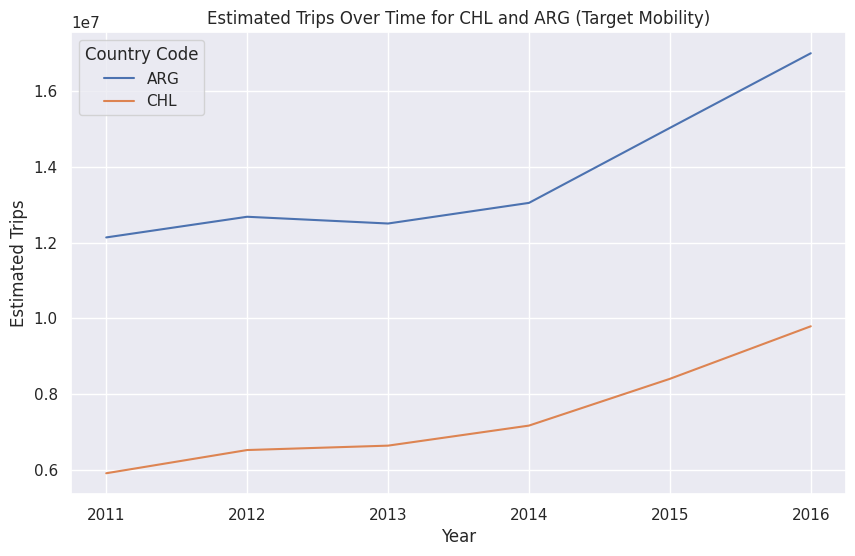

In [5]:
import seaborn as sns

# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = mobility_df[mobility_df['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='value', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Estimated Trips')
plt.title('Estimated Trips Over Time for CHL and ARG (Target Mobility)')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

In [6]:
# Filtrar los indicadores necesarios
mobility_data = df[df['indicator'] == 'target_mobility'][['country_code', 'year', 'value']].rename(columns={'value': 'target_mobility'})
population_data = df[df['indicator'] == 'total_population_wb'][['country_code', 'year', 'value']].rename(columns={'value': 'total_population_wb'})

# Combinar los datos por país y año
merged_data = pd.merge(mobility_data, population_data, on=['country_code', 'year'], how='inner')

# Calcular la nueva variable
merged_data['mobility_ratio'] = merged_data['target_mobility'] / merged_data['total_population_wb']

# Mostrar las primeras filas del resultado
print(merged_data.head())

  country_code  year  target_mobility  total_population_wb  mobility_ratio
0          ARG  2011       12133921.0           41730660.0        0.290768
1          CHL  2011        5916559.0           17351816.0        0.340976
2          ARG  2012       12678938.0           42161721.0        0.300722
3          CHL  2012        6528705.0           17519119.0        0.372662
4          ARG  2013       12500972.0           42582455.0        0.293571


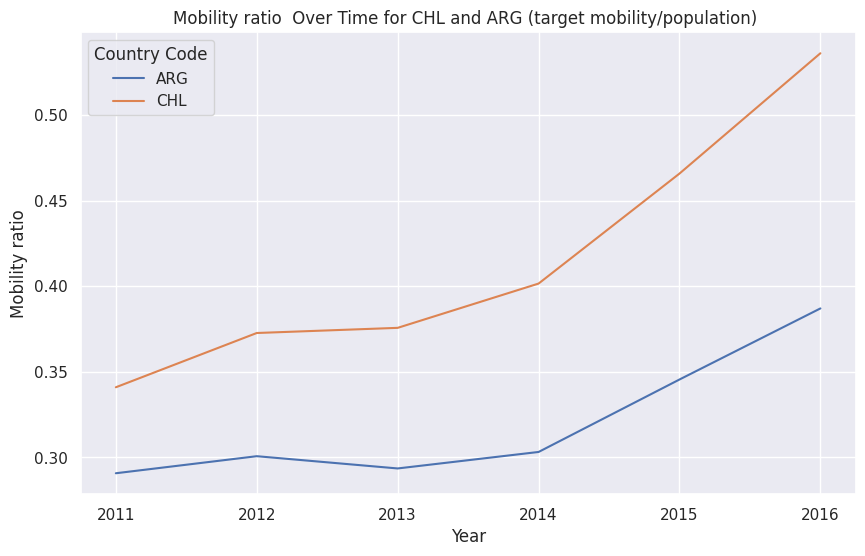

In [7]:
# Filter for countries CHL and ARG
countries = ['CHL', 'ARG']
country_df = merged_data[merged_data['country_code'].isin(countries)]

# Create the time series plot using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(x='year', y='mobility_ratio', hue='country_code', data=country_df)

plt.xlabel('Year')
plt.ylabel('Mobility ratio')
plt.title('Mobility ratio  Over Time for CHL and ARG (target mobility/population) ')
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

In [8]:
# Pivot the table to have 'source_mobility' and 'target_mobility' as columns
merged_data_pivot = merged_data.pivot_table(index=['year'], columns='country_code', values='mobility_ratio').reset_index()
merged_data_pivot

country_code,year,ARG,CHL
0,2011,0.290768,0.340976
1,2012,0.300722,0.372662
2,2013,0.293571,0.375670
3,2014,0.303195,0.401525
4,2015,0.345507,0.465762
5,2016,0.387013,0.536017


These time series show that the ratio of travel per person is reversed between Chileans and Argentines. **Chileans move proportionally more than Argentines.**

By 2016 54 people out of every 100 made some trip in Chile, while 39 in Argentina.

## Mobility from venezuelans, argentina and bolivians

In [9]:
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/gm_argentina.csv'

df_mob = pd.read_csv(file_path)


## Exploratory analysis of the constructed database.

Indicators:

I1.1	Mouvements to country	target_mobility

I1.2	Mouvements from country	source_mobility

I1.3	Mouvements to country from LATAM	target_mobility_latam

I2.1	inmigration flows	inmigration_stock

I2.2	emigration flows	emigration_stock

I3.1	Total population	total_population_wb

I3.2	International migrant stock (% of population)	migration_pct_wb

C1	% of migration	migration_pct_calc

I3.2	GDP (US$)	gdp_wb

I3.3	Gini index	gini_wb

I3.4	Poverty	poverty_wb

I3.5	Multidimensional poverty	poverty_multi_wb